# Traitement de signal
## Atelier \#6 : Filtrage des signaux
### Support de cours disponible à l'adresse : [https://www.github.com/a-mhamdi/isetbz](https://www.github.com/a-mhamdi/isetbz)

---

La convolution est une intégrale qui exprime le degré de chevauchement d'une fonction $h$ lorsqu'elle est décalée sur une autre fonction $x$.

Par définition, une convolution $x\ast h$ se mesure par l'équation suivante :

$$
x\ast h \;=\; \displaystyle\int_{0}^{t}h(t-\varsigma)x(\varsigma)d\varsigma.
$$

Ce produit est utilisé fréquemment pour le filtrage d'un signal contaminé par du bruit gênant ainsi la perception correcte de l'information. Un produit de convolution peut être vu comme une technique de calcul de moyenne à un instant $t$ d'une fonction $x$ pondérée par la fonction $h$ et vice-versa.

On se propose de générer un signal sinusoïdal d'amplitude $1$ et de fréquence $1$ Hz que l'on note $x(t)$. 

$$
x(t) \;=\; \displaystyle\sin\left(2\pi f t\right),\quad\text{avec}\quad f \,=\, 1\,\text{Hz}.
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc({"keymap.grid": "g", "font.serif": "Charter", "font.size": 10})

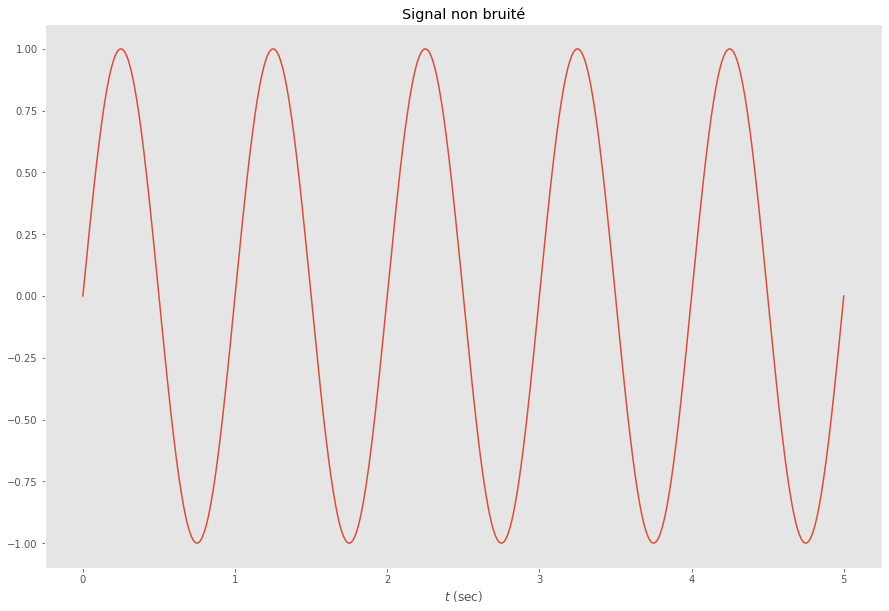

<Figure size 1080x720 with 0 Axes>

In [2]:
t = np.linspace(0, 5.0, 1000)
x = np.sin(2 * np.pi * t) 
plt.plot(t, x)
plt.title("Signal non bruité")
plt.xlabel("$t$ (sec)")
plt.grid()
plt.show()

Nous synthétisons ici un exemple de bruit :

$$
b(t) \;=\; 
-0.4 \displaystyle\sin\left(2\pi f_{\text{b}_1} t\right)
+0.6 \displaystyle\sin\left(2\pi f_{\text{b}_2} t\right),
\quad\text{avec}\quad \left\{\begin{array}{lcl}f_{\text{b}_1}&=& 500\,\text{Hz},\\&&\\ f_{\text{b}_2}&=& 750\,\text{Hz}.\end{array}\right.
$$

Nous le rajouterons par la suite au signal d'origine $x(t)$ comme suit :

$$
x_\text{b} \;=\; x(t) + b(t)
$$

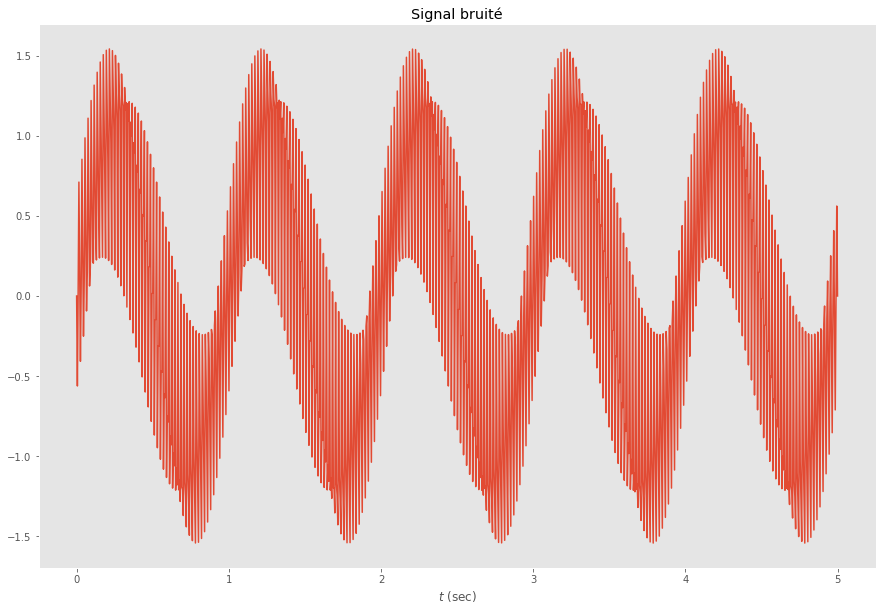

<Figure size 1080x720 with 0 Axes>

In [3]:
# Générer un bruit
b = -0.4 * np.sin(1000 * np.pi * t) + 0.6 * np.sin(1500 * np.pi * t)
x_b = x + b
plt.plot(t, x_b)
plt.title("Signal bruité")
plt.xlabel("$t$ (sec)")
plt.grid()
plt.show()

Le filtre à appliquer s'agit d'un passe-bas de réponse impulsionnelle :

$$
h(t) \;=\; \displaystyle\frac{1}{\tau}\mathrm{e}^{-\displaystyle\frac{t}{\tau}},\quad\text{avec}\quad \tau\,=\, 0.1\,\text{sec}.
$$

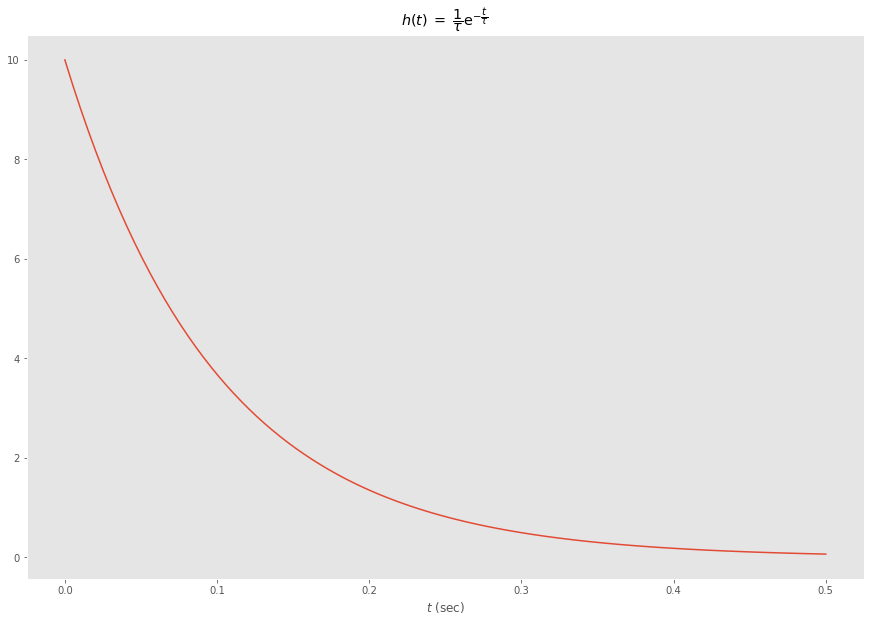

<Figure size 1080x720 with 0 Axes>

In [4]:
tau = 0.1; t_h = np.linspace(0, 5*tau, 100)
h = 1/tau * np.exp(-t_h/tau)
plt.plot(t_h, h)
plt.title(r"$h(t) \;=\; \dfrac{1}{\tau}\mathrm{e}^{-\dfrac{t}{\tau}}$")
plt.xlabel("$t$ (sec)")
plt.grid()
plt.show()

La sortie $\tilde{x}$ du filtre est le résultat du produit de convolution suivant :

$$
\tilde{x}(t) \;=\; \displaystyle\int_{0}^{t}h(t-\varsigma)x(\varsigma)d\varsigma
$$

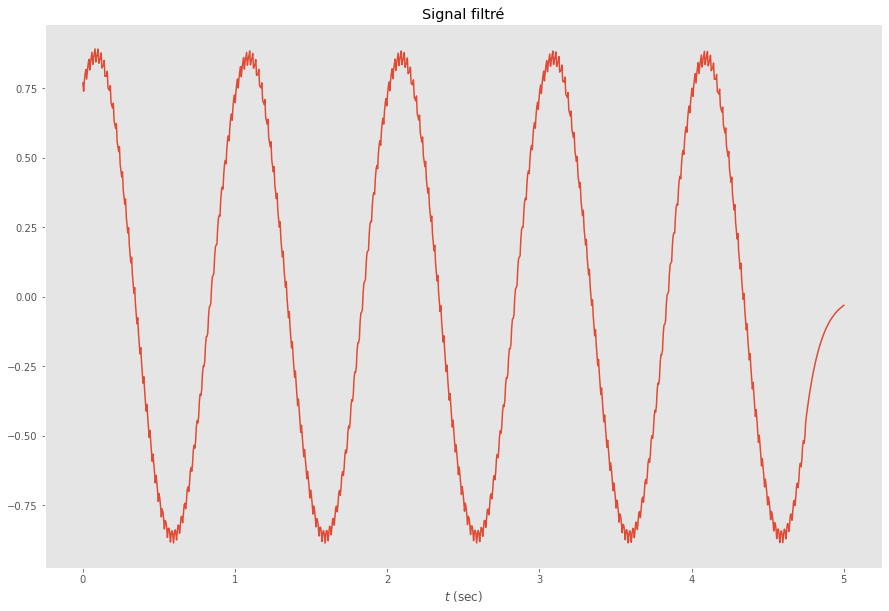

<Figure size 1080x720 with 0 Axes>

In [5]:
# Normaliser le filtre : filt = h/Sigma_h
filt = h/h.sum()
x_f = np.convolve(x_b, filt, 'same')
plt.plot(t, x_f)
plt.title("Signal filtré")
plt.xlabel("$t$ (sec)")
plt.grid()
plt.show()